# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Understanding of business task in terms of data

The key task is to perform a regression analysis on the car price data set, using various features such as mileage, age, model, brand, etc. as predictors. The objective is to identify the most significant factors that influence the car price and to quantify their effects. The output of the analysis should be a report that summarizes the main findings and provides actionable insights to the client, a used car dealership, on how to price their cars competitively and attractively for the consumers.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Key Steps to evaluate the data

1. Load the data
2. Review all the data types of the data
3. Review how many records have Null or NaN values
4. Review how many duplicate records
5. Review which records are bad and how to clean the data i.e. Remove the records with null values, replace the records which have nulls with specific values for the columns, replace data which are not in a right format to proper format, etc.

In [1]:
#Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
from warnings import filterwarnings 
filterwarnings('ignore')

from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder   
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error, mean_squared_log_error
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#Loading of vehicles data and reviewing the data field types and snapshot of data
df = pd.read_csv('data/vehicles.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [3]:
# remove duplicate rows
df = df.drop_duplicates()
df.info()

# No duplicate records based on the data seen

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
#Count number of NaN values
# Round 2
#df.drop('VIN', axis=1, inplace=True)
#df.drop('paint_color', axis=1, inplace=True)
#--------------------------------------------
nan_counts = df.isna().sum()
print(nan_counts)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [5]:
# get unique values for each column to understand what kind of data each of them have and which ones can be cleaned up vs. 
# which records with null values can be removed
unique_values = {col: df[col].unique() for col in df.columns}

unique_values

{'id': array([7222695916, 7218891961, 7221797935, ..., 7301591147, 7301591140,
        7301591129], dtype=int64),
 'region': array(['prescott', 'fayetteville', 'florida keys',
        'worcester / central MA', 'greensboro', 'hudson valley',
        'medford-ashland', 'erie', 'el paso', 'bellingham',
        'skagit / island / SJI', 'la crosse', 'auburn', 'birmingham',
        'dothan', 'florence / muscle shoals', 'gadsden-anniston',
        'huntsville / decatur', 'mobile', 'montgomery', 'tuscaloosa',
        'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
        'southeast alaska', 'flagstaff / sedona', 'mohave county',
        'phoenix', 'show low', 'sierra vista', 'tucson', 'yuma',
        'fort smith', 'jonesboro', 'little rock', 'texarkana',
        'bakersfield', 'chico', 'fresno / madera', 'gold country',
        'hanford-corcoran', 'humboldt county', 'imperial county',
        'inland empire', 'los angeles', 'mendocino county', 'merced',
        'modesto', 'monterey bay'

In [ ]:
# Looking at the data, some obvious data clean ups.
# 1. Replace "." to empty string in  Model Year
# 2. Remove any NaN from Manufacturer
# 3. Remove any NaN from Condition
# 4. Remove any NaN from Cylinders
# 5. Remove any NaN from Fuel
# 6. Remove any NaN from Size
# 7. Remove any NaN from Type
# 8. Remove any NaN from Drive


In [6]:
# replace model year "." with ""
df['year'] = df['year'].replace('\.', '', regex=True)
df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)

# replace cylinders in data
df['cylinders'] = df['cylinders'].replace('\ cylinders', '', regex=True)
df['cylinders'] = df['cylinders'].replace('others', '0', regex=True)
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce').fillna(0).astype(int)
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
# Replace all the null values in all columns+
df = df.dropna()
nan_counts = df.isna().sum()
print(nan_counts)
df.info()
df.shape
# 34868 entries remaining of 426836

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35672 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            35672 non-null  int64  
 1   region        35672 non-null  object 
 2   price         35672 non-null  int64  
 3   year          35672 non-null  int32  
 4   manufacturer  35672 non-null  object 
 5   model         35672 non-null  object 
 6   condition     35672 non-null  object 
 7   cylinders     35672 non-null  int32  
 8   fuel          35672 non-null  object 
 9   odometer      35672 non-null  float64
 10  title_status  35672 non-null  

(35672, 18)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [9]:
df.head(10)
df.tail(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426780,7303328817,wyoming,34995,2014,gmc,sierra,good,8,gas,58095.0,clean,automatic,3GTU2VEC1EG297875,4wd,full-size,truck,black,wy
426782,7303328786,wyoming,23995,2013,toyota,tundra,good,8,gas,114215.0,clean,automatic,5TFUW5F19DX319892,4wd,full-size,truck,black,wy
426783,7303328773,wyoming,15999,2000,ram,3500,good,6,gas,199090.0,clean,automatic,3B7MF3663YM222618,4wd,full-size,truck,white,wy
426784,7303328776,wyoming,24995,2014,gmc,sierra,good,8,gas,128722.0,clean,automatic,1GT423CG6EF114143,4wd,full-size,truck,white,wy
426785,7303314912,wyoming,23495,2015,ford,f150 xlt 4x4,like new,8,gas,146795.0,clean,automatic,1FTFX1EF5FFC24427,4wd,full-size,truck,black,wy
426788,7303227528,wyoming,12995,2016,chevrolet,cruze lt,like new,4,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy
426792,7303114896,wyoming,32999,2014,ford,"f350, xlt",excellent,8,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy
426793,7303112347,wyoming,15999,2018,chevrolet,"cruze, lt",excellent,4,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy
426833,7302338378,wyoming,6800,1997,jaguar,xk8 convertible,good,8,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy
426836,7302301268,wyoming,0,2018,ram,2500,excellent,6,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy


In [8]:
unique_values_manufacturer = df['manufacturer'].unique()
unique_values_condition = df['condition'].unique()
unique_values_cylinders = df['cylinders'].unique()
unique_values_fuel = df['fuel'].unique()
unique_values_title_status = df['title_status'].unique()
unique_values_transmission = df['transmission'].unique()
unique_values_size = df['size'].unique()
unique_values_drive = df['drive'].unique()
unique_values_paint_color = df['paint_color'].unique()
unique_values_type = df['type'].unique()
unique_values_model = df['model'].unique()
unique_values_odometer = df['odometer'].unique()
unique_values_year = df['year'].unique()
unique_values_price = df['price'].unique()
unique_values_state = df['state'].unique()
print(unique_values_manufacturer)
print(unique_values_condition)
print(unique_values_cylinders)
print(unique_values_fuel)
print(unique_values_title_status)
print(unique_values_transmission)
print(unique_values_size)
print(unique_values_drive)
print(unique_values_paint_color)
print(unique_values_type)
print(unique_values_model)
print(unique_values_odometer)
print(unique_values_year)
print(unique_values_price)
print(unique_values_state)

def get_unique_values(df, columns):
    unique_values = {column: df[column].unique() for column in columns}
    return unique_values

# Assuming 'columns_to_check' is a list of the column names you want to check
columns_to_check = ['manufacturer', 'condition', 'cylinders']
unique_values = get_unique_values(df, columns_to_check)

for column, values in unique_values.items():
    print(f"The unique values in the {column} column are: {values}")

['chevrolet' 'toyota' 'bmw' 'mazda' 'ford' 'mercedes-benz' 'ferrari'
 'lexus' 'audi' 'mitsubishi' 'infiniti' 'nissan' 'volkswagen' 'honda'
 'ram' 'hyundai' 'fiat' 'cadillac' 'jeep' 'gmc' 'jaguar' 'volvo' 'dodge'
 'kia' 'chrysler' 'subaru' 'acura' 'mini' 'buick' 'rover' 'lincoln'
 'porsche' 'saturn' 'harley-davidson' 'pontiac' 'mercury' 'tesla'
 'alfa-romeo' 'datsun' 'land rover' 'aston-martin']
['like new' 'excellent' 'fair' 'good' 'new' 'salvage']
[ 6  4  8  5 10  3  0 12]
['gas' 'hybrid' 'diesel' 'other' 'electric']
['clean' 'rebuilt' 'salvage' 'lien' 'missing' 'parts only']
['automatic' 'manual' 'other']
['full-size' 'compact' 'mid-size' 'sub-compact']
['rwd' 'fwd' '4wd']
['white' 'blue' 'silver' 'red' 'grey' 'black' 'brown' 'green' 'custom'
 'yellow' 'orange' 'purple']
['van' 'sedan' 'convertible' 'truck' 'coupe' 'SUV' 'hatchback' 'wagon'
 'pickup' 'other' 'mini-van' 'offroad' 'bus']
['express cargo van' 'echo' '525i' ... 'f150, xlt' 'f150, platinum'
 'cruze, 2lt']
[ 68472.  69125.

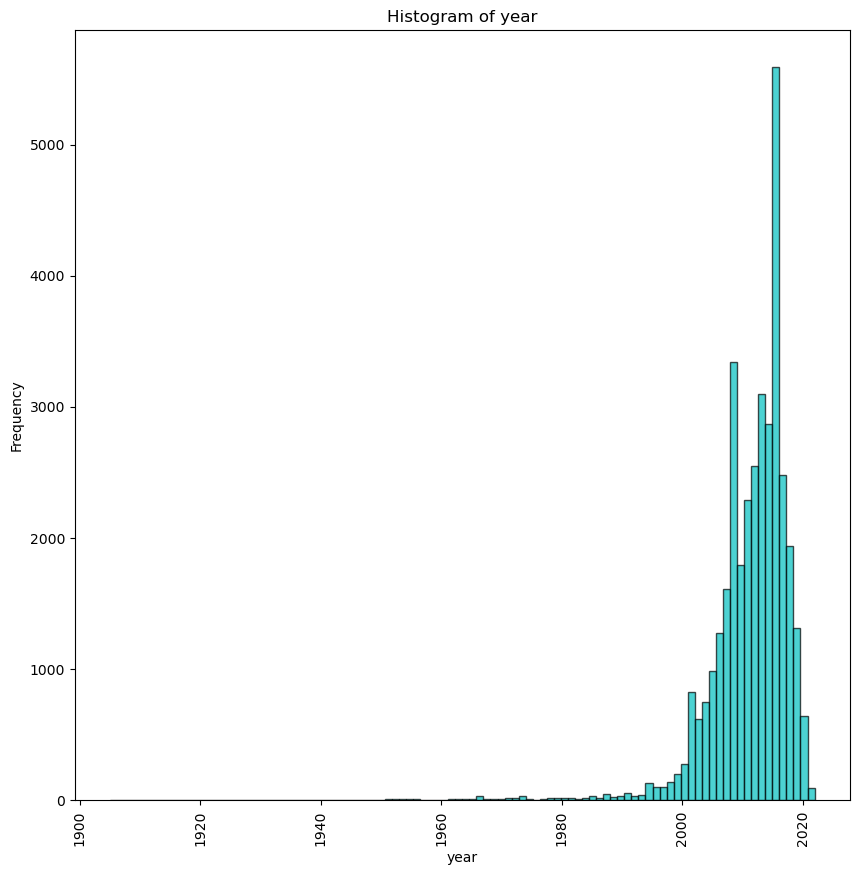

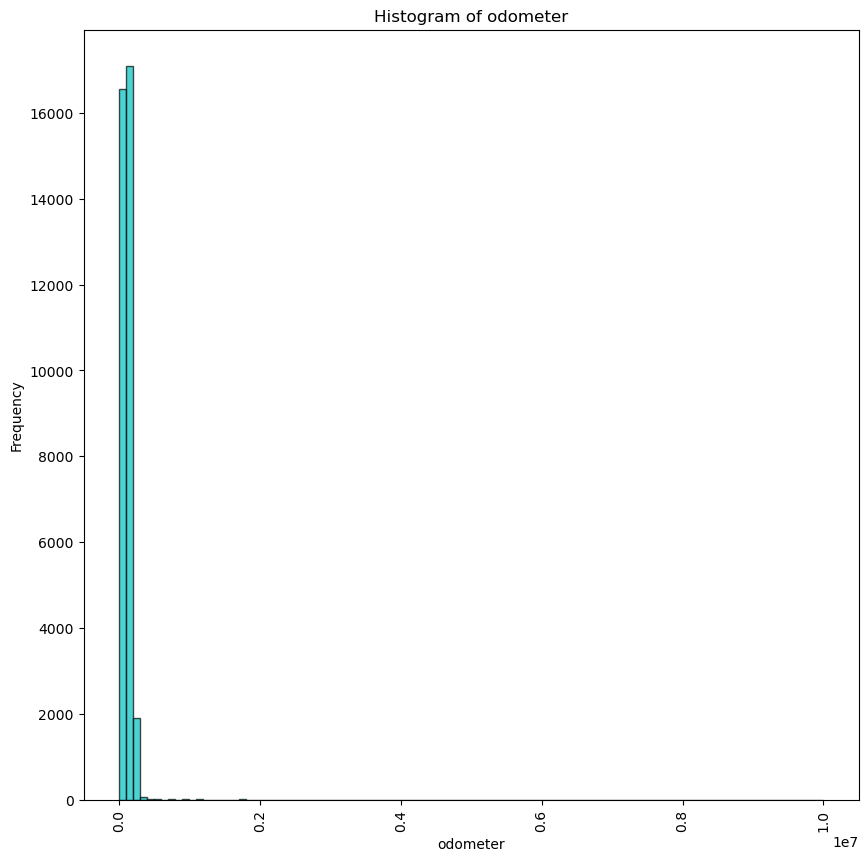

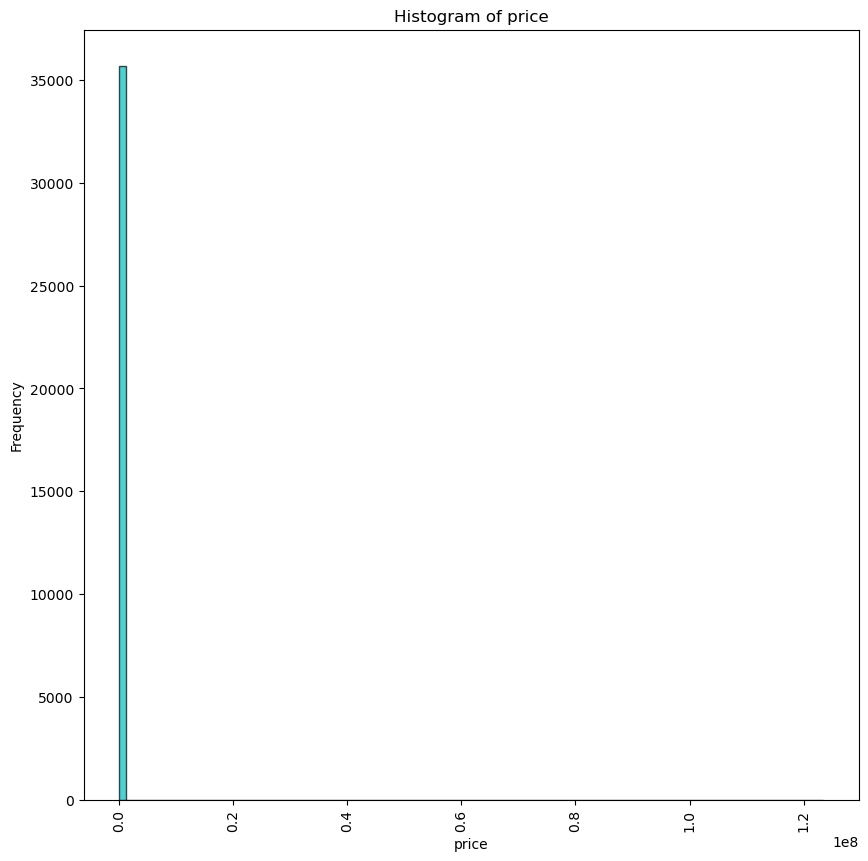

In [9]:
df_hist = df[['year', 'odometer', 'price']]
for column in df_hist.columns:
    plt.figure(figsize=(10, 10))
    plt.hist(df[column], bins=100, color='c', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')
    plt.ylabel("Frequency")
    plt.show()


In [10]:
# Calculating the Outliers
first_quartile = df['price'].quantile(.10)  #Round 1 0.25, Round 2 0.10
third_quartile = df['price'].quantile(.90)  #Round 1 0.775, Round 2 0.90
iqr = df['price'].quantile(.90) - df['price'].quantile(.10)
print(first_quartile)
print(third_quartile)
onehalf_qtr = 1.5*iqr
# If outlier is lower than the lowest value, pick the first quartile
if onehalf_qtr < first_quartile: 
    lower = first_quartile - 1.5*iqr 
else:    
    lower = first_quartile
upper = third_quartile + 1.5*iqr
print(iqr)
print(lower)
print(upper)

1900.0
33997.9
32097.9
1900.0
82144.75


In [11]:
# Removing the outliers
df_no_outlier = df.loc[(df['price']>lower) & (df['price']<upper)]
df_no_outlier.set_index('id').sort_values(by='price', ascending=True).head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7316861253,seattle-tacoma,1950,2008,chevrolet,malibu ls sedan 4d,good,4,gas,176100.0,clean,automatic,1G1ZG57B08F208095,fwd,full-size,sedan,black,wa
7314824086,lehigh valley,1950,2005,hyundai,elantra,fair,4,gas,156187.0,clean,automatic,KMHDN46D05U038571,fwd,mid-size,sedan,silver,pa
7313833487,jacksonville,1950,2006,ford,freestar,excellent,6,gas,208000.0,clean,automatic,2FMDA522X6BA66648,fwd,mid-size,mini-van,grey,fl
7316401803,los angeles,1950,2013,chevrolet,impala,like new,6,gas,115988.0,clean,automatic,2G1WG5E32D1238652,fwd,full-size,sedan,white,ca
7316332819,rochester,1950,2004,subaru,outback,fair,6,gas,201000.0,clean,automatic,4S3BH806547622949,4wd,mid-size,wagon,silver,ny
7310129754,eugene,1950,2002,dodge,neon se,good,4,gas,151517.0,clean,automatic,1B3ES46C22D611539,fwd,compact,sedan,red,or
7315723592,delaware,1950,2003,volvo,s60,excellent,5,gas,164991.0,clean,automatic,YV1RH59H032265154,4wd,mid-size,sedan,green,de
7311884969,lancaster,1950,2002,jaguar,xj8,fair,8,gas,130400.0,clean,automatic,SAJDA14C92LF47248,rwd,full-size,sedan,green,pa
7316737544,minneapolis / st paul,1950,2006,dodge,stratus,excellent,6,gas,181125.0,clean,automatic,1B3EL46X86N182567,fwd,full-size,sedan,silver,mn


In [12]:
#Performing one hot encoding on the categorical columns
# Round 1 - df_no_outlier_encoded_key_features = pd.get_dummies(df_no_outlier[['id','condition', 'manufacturer', 'fuel', 'title_status', 'transmission', 'size', 'type']]).set_index('id')
df_no_outlier_encoded_key_features = pd.get_dummies(df_no_outlier[['id','condition', 'manufacturer', 'fuel', 'title_status', 'transmission', 'size', 'type']]).set_index('id')
df_no_outlier_encoded_key_features
object_cols_ = df_no_outlier.select_dtypes('object').columns.tolist()
df_no_outlier_clean = df_no_outlier.drop(object_cols_, axis = 1)
df_no_outlier_clean
df_no_outlier_clean_merged = pd.merge(df_no_outlier_encoded_key_features,df_no_outlier_clean, on='id')
# Dropping 'price' column
y = df_no_outlier_clean_merged['price']
df_no_outlier_clean_merged = df_no_outlier_clean_merged.drop('price', axis=1)
df_no_outlier_clean_merged.set_index('id')

,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,...,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,year,cylinders,odometer
id,,,,,,,,,,,,,,,,,,,,,
7316482063,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2002,4,155000.0
7316429417,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1995,6,110661.0
7315946365,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2008,4,56700.0
7315354216,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2011,6,164000.0
7315349921,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1972,6,88100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303314912,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2015,8,146795.0
7303227528,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2016,4,61127.0
7303114896,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2014,8,154642.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
# Principal Component Analysis


def pca(X, r = 5, column_names = None):
    x_norm =( X - X.mean())/X.std()
    U, sigma, VT = svd(x_norm)
    Sigma = np.diag(sigma)
    Ur = U[:, :r]
    Sigma_r = Sigma[:r, :r]
    if column_names is None:
        column_names = [f'pca_{i}' for i in range(1, r + 1)]
    loadings = pd.DataFrame(VT[:r, :].T, columns=column_names, index=X.columns)
    return pd.DataFrame(Ur @ Sigma_r, columns=column_names), loadings

column_names = df_no_outlier_clean_merged.columns.tolist()
XT, loadings = pca(df_no_outlier_clean_merged, r = 5)
print(XT.shape)
XT.head(100)
print(loadings.all)


<Figure size 800x600 with 0 Axes>

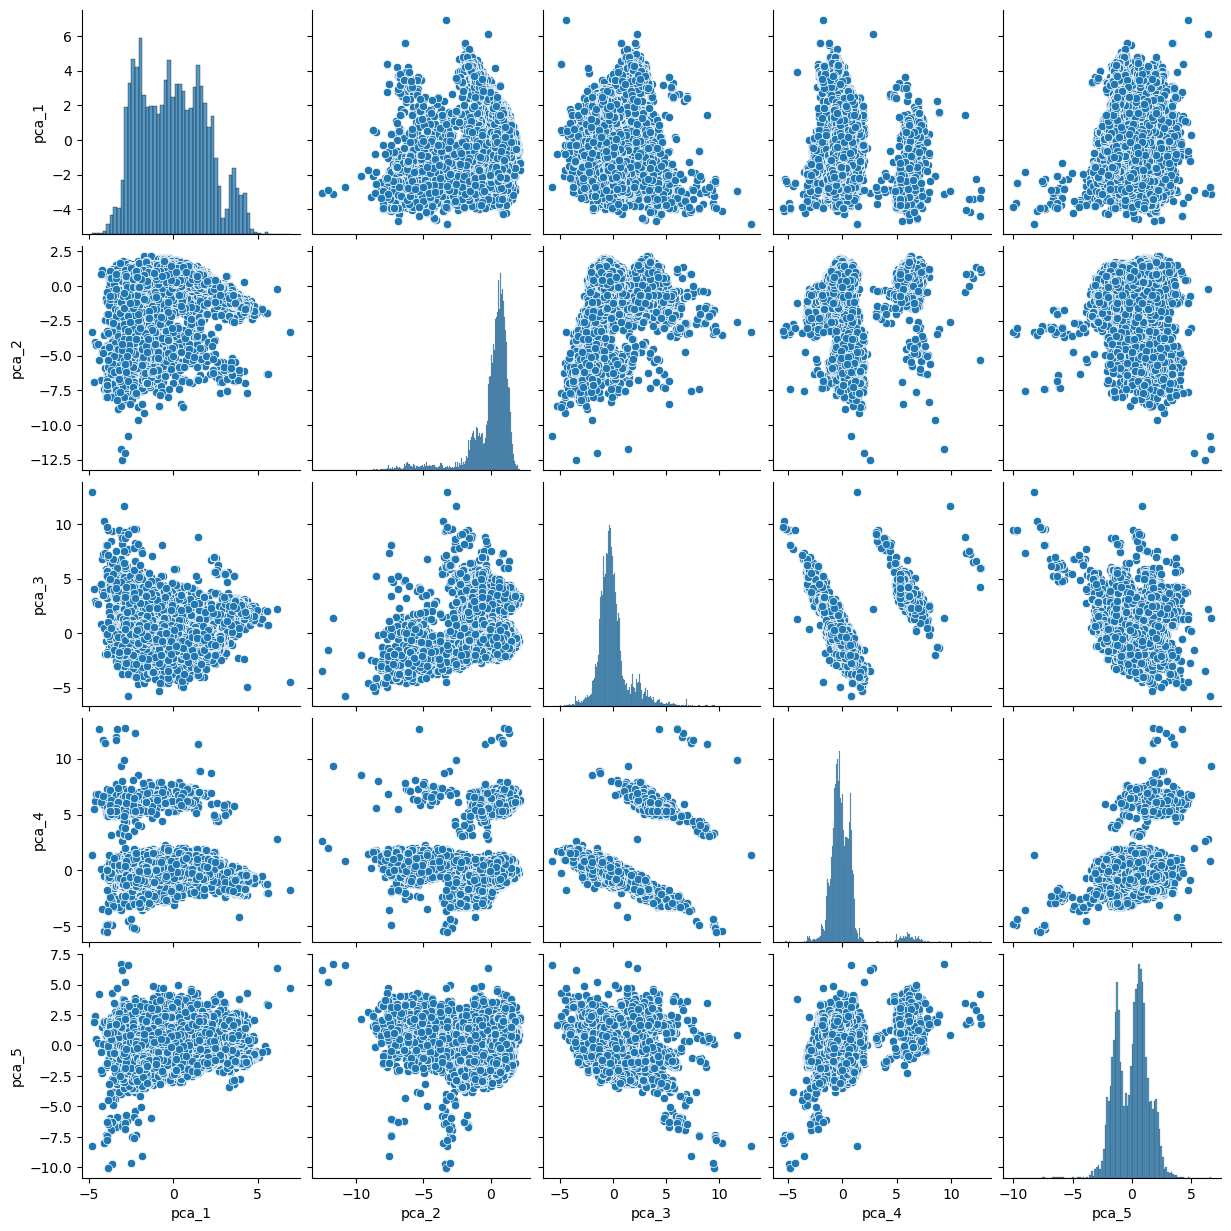

In [ ]:


plt.figure(figsize=(8, 6))
sns.pairplot(XT)
plt.show()

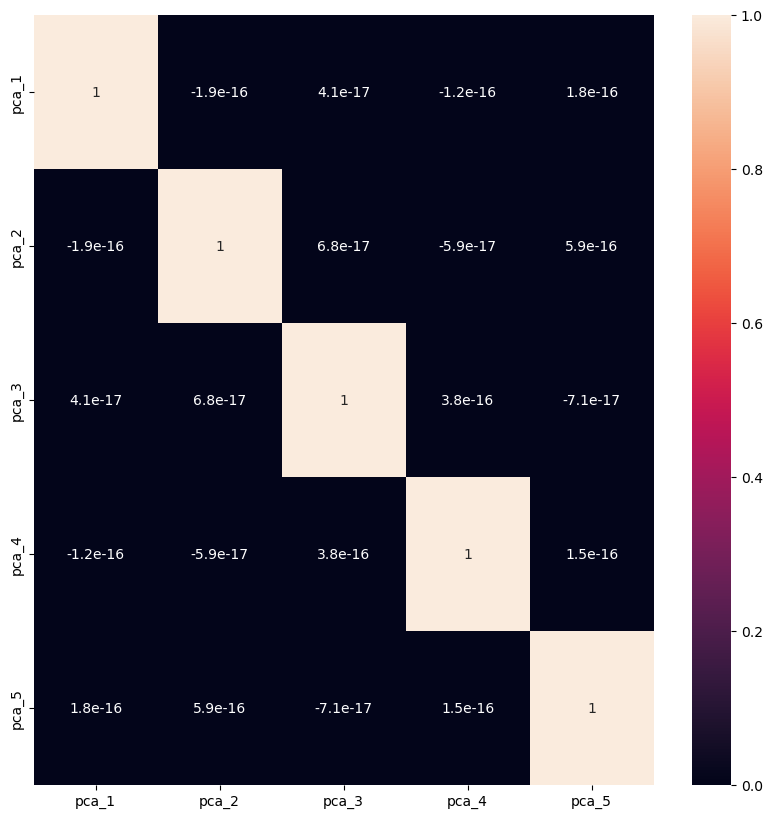

In [ ]:
plt.figure(figsize=(10, 10))
corr_matrix = XT.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

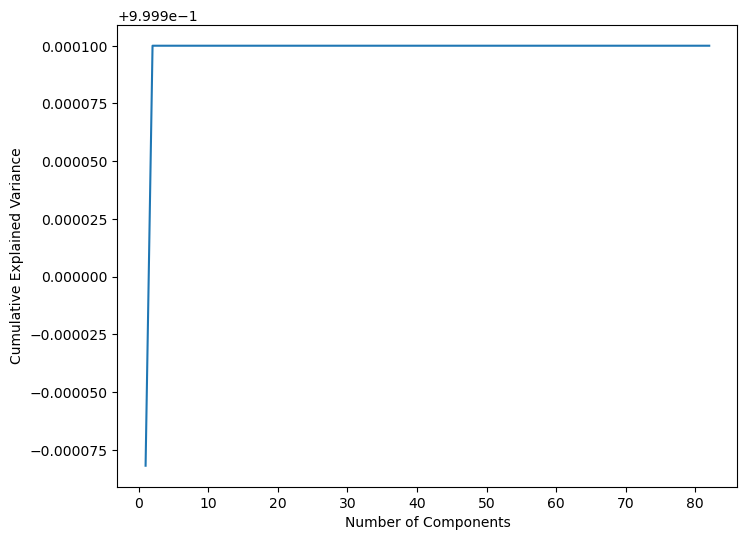

1


In [ ]:


# Fit PCA on your data
pca = PCA().fit(df_no_outlier_clean_merged)

# Compute explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose number of components that explain a sufficient amount of variance
n_components = np.where(np.cumsum(explained_variance_ratio) > 0.95)[0][0] + 1
print(n_components)
# Reduce your dataset to the chosen number of components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(df_no_outlier_clean_merged)

In [ ]:
#==================================================

def singular_values(X, scale = False):
    if scale:
        X = (X - X.mean())/X.std()
        
    u, sigma, vt = svd(X)
    return sigma


print(type(singular_values(df_no_outlier_clean_merged)))
sigma = singular_values(df_no_outlier_clean_merged)
print(sigma.shape)

<class 'numpy.ndarray'>
(82,)


In [13]:



X = df_no_outlier_clean_merged
#y = df_no_outlier_clean_merged['price']
all_features_linreg = LinearRegression(fit_intercept=False).fit(X, y)
linreg_mse = mean_squared_error(all_features_linreg.predict(X), y)


# Answer check
print(all_features_linreg)
print(all_features_linreg.coef_)
print(linreg_mse)


LinearRegression(fit_intercept=False)
[-6.86979897e-05 -8.40562800e+04 -8.75259062e+04 -8.57477365e+04
 -8.14401998e+04 -7.60287300e+04 -8.85775247e+04 -1.47276408e+04
 -5.84010786e+03  1.65182856e+04 -1.20288484e+04 -1.36174873e+04
 -1.53620167e+04 -1.36253891e+04 -1.48063239e+04 -1.78328630e+04
  9.00158524e+03 -1.67549401e+04  1.63055313e+04 -2.24618955e+04
 -1.49366676e+04 -1.33354260e+04 -2.30884788e+04 -1.60673462e+04
 -1.79287213e+04 -1.34897190e+04 -1.46834869e+04 -1.37899020e+04
 -1.83381629e+04 -2.08114643e+04 -1.19220298e+04 -1.37100616e+04
 -1.66404746e+04 -1.14201377e+04 -1.71741186e+04 -1.81684251e+04
 -1.79498673e+04 -1.78549917e+04 -1.39131174e+04 -2.53225647e+03
 -1.39121142e+04 -9.35791252e+03 -1.95536580e+04 -1.53245099e+04
  1.42571914e+04 -1.40371225e+04 -1.72377048e+04 -1.52235677e+04
 -9.16794586e+04 -1.00057816e+05 -1.03953681e+05 -1.03604081e+05
 -1.04081327e+05 -8.53876046e+04 -8.19555192e+04 -7.81860294e+04
 -8.17605120e+04 -8.72673264e+04 -8.88193726e+04 -1.

In [14]:


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5)
best_features = selector.fit_transform(X_train, y_train)
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())
print(best_features_df)

       fuel_diesel  type_sedan  type_truck    year  cylinders
0              0.0         0.0         0.0  2011.0        8.0
1              0.0         1.0         0.0  2017.0        4.0
2              0.0         0.0         0.0  2016.0        6.0
3              0.0         0.0         0.0  2007.0        8.0
4              0.0         0.0         0.0  2017.0        4.0
...            ...         ...         ...     ...        ...
22420          0.0         0.0         0.0  2002.0        4.0
22421          0.0         0.0         0.0  2006.0        6.0
22422          0.0         1.0         0.0  2015.0        6.0
22423          1.0         0.0         1.0  2005.0        6.0
22424          0.0         1.0         0.0  2013.0        4.0

[22425 rows x 5 columns]


In [ ]:



pipe = Pipeline([('column_selector', selector),
                ('linreg', LinearRegression())])
pipe.fit(X_train, y_train)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
### END SOLUTION

# Answer check
print(f'Train MSE: {train_mse: .2f}')
print(f'Test MSE: {test_mse: .2f}')
pipe

Train MSE:  49658652.84
Test MSE:  52377829.42


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('linreg', LinearRegression())])

In [ ]:
backward_selector = SequentialFeatureSelector(LinearRegression(), 
                                              n_features_to_select=5,
                                              direction = 'backward')
backward_pipe = Pipeline([('column_selector', backward_selector),
                ('linreg', LinearRegression())])
backward_pipe.fit(X_train, y_train)
train_preds = backward_pipe.predict(X_train)
test_preds = backward_pipe.predict(X_test)
backward_train_mse = mean_squared_error(y_train, train_preds)
backward_test_mse = mean_squared_error(y_test, test_preds)
### END SOLUTION

# Answer check
print(f'Train MSE: {backward_train_mse: .2f}')
print(f'Test MSE: {backward_test_mse: .2f}')
backward_pipe

Train MSE:  49658652.84
Test MSE:  52377829.42


Pipeline(steps=[('column_selector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression(),
                                           n_features_to_select=5)),
                ('linreg', LinearRegression())])

In [ ]:
selected_features = X_train.columns[backward_selector.get_support()]
print(selected_features)

Index(['fuel_diesel', 'type_truck', 'year', 'cylinders', 'odometer'], dtype='object')


In [ ]:


# Assuming X and y are your features and target variable
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.01)  # Initialize Ridge Regression model. You can adjust the alpha parameter as needed.
ridge.fit(X_train, y_train)  # Fit the model on the training data

# Evaluate the model
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# Get the coefficients
coefficients = ridge.coef_

# Get the feature importance (absolute value of coefficients)
importance = np.abs(coefficients)

# Get the names of the features from your DataFrame
feature_names = X.columns

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print(feature_importance_df)

Mean Squared Error: 42569084.87747378
                      feature    importance
18       manufacturer_ferrari  24588.102583
44         manufacturer_tesla  23835.677427
16        manufacturer_datsun  18822.599789
9   manufacturer_aston-martin  13863.358969
19          manufacturer_fiat   8266.856670
..                        ...           ...
77                   type_van    169.389974
25      manufacturer_infiniti      3.104387
81                   odometer      0.071447
0                          id      0.000062
56    title_status_parts only      0.000000

[82 rows x 2 columns]


d:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.97701e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:


# Initialize RFE model
rfe = RFE(estimator=Ridge(alpha=1), n_features_to_select=5)

# Fit the model
rfe.fit(X_train, y_train)

# Transform the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train Ridge Regression model on selected features
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_rfe, y_train)

# Evaluate the model
y_pred = ridge.predict(X_test_rfe)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Get the names of the top features selected
top_features = X.columns[rfe.support_]

print(f"The top 5 features selected by RFE are: {top_features}")

d:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.86826e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\Program Files\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.86826e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Mean Squared Error: 83432054.54641536
The top 5 features selected by RFE are: Index(['condition_fair', 'manufacturer_alfa-romeo', 'manufacturer_ferrari',
       'manufacturer_tesla', 'fuel_diesel'],
      dtype='object')


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Key Findings
# 1. Of the 426836 records, 35672 records remained after removing null values
# 2. Of those amount, only 25489 records remained after removing outliers
# 3. Once One Hot Encoding of specific columns was done, the number of columns increased to 82
# 4. On evaluating using PCA, with different r values, the variance continued to stay at 1 indicating that all the values are 
#    important and cannot be removed. 
# 5. On using the Linear Regression model, the MSE was very high.
# 6. On using the Sequential Feature Selector, the following features were selected: 
#       a. fuel_diesel  
#       b. type_truck
#       c. year 
#       d. cylinders
#       e. odometer
# 7. On using the Linear Regression model, the train and test MSE was very high indicating that the model is not a good fit.
# 8. On using the Sequential Feature Selector with backward direction, the following features were selected:
#       a. fuel_diesel
#       b. type_truck
#       c. year
#       d. cylinders
#       e. odometer
#    Eventhough the Train and Test MSE were high, the features selected were the same as the Sequential Feature Selector.
# 9. On using the Ridge Regression model, the MSE came high as well. The following top 5 features were selected:
#       a. manufacturer_ferrari
#       b. manufacturer_tesla
#       c. manufacturer_datsun
#       d. manufacturer_aston-martin
#       e. manufacturer_fiat
# 10. On using the Ridge Regression model with RFE, the MSE came high as well. The following top 5 features were selected:
#       a. condition_fair
#       b. manufacturer_alfa-romeo
#       c. manufacturer_ferrari
#       d. manufacturer_tesla
#       e. fuel_diesel
# Based on the above findings, none of the models were able to predict the price of the vehicles accurately.
# The size of the data set after the null record removal was very small and perhaps that is the reason for it not able to predict
# the price accurately. The data set needs to be larger and more features need to be added to the data set to make it more 
# accurate.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
# Based on the current findings, I would not recommend this model to be used for predicting the price of the vehicles. It will
# be better to evaluate the results with a larger data set and more features added to the data set and then evaluate the results again
# to see if the model is able to predict the price of the vehicles accurately.